In [5]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt

from Inference.GeNVI_predictive import GeNPredVI, GeNetEns

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cuda:0'

In [9]:
from Experiments.foong import Setup
layerwidth=50
nblayers=1
#setup=Setup(device,layerwidth=layerwidth,nblayers=nblayers)
setup=Setup(device)

# Target density #

In [10]:
logprior=setup.logPredPrior
loglikelihood=setup.loglikelihood
projection=setup.projection
size_sample=setup.n_train_samples
param_count=setup.param_count
model=setup._model

size_sample,param_count

(200, 151)

# Generative Network #

In [32]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001
lat_dim=2


GeN = GeNetEns(1, lat_dim, 50, param_count, activation, 0.2, init_b, device)

In [33]:
%matplotlib inline
from tempfile import TemporaryDirectory


k_MC=100#size_sample

#sample, = ax.scatter([],[],color='red',alpha=0.07)
#fig.canvas.draw()
    
    
'''
def show(GeN,n,alpha=0.07):
    Z=GeN(n).detach().clone().cpu()
    plt.pcolormesh(grid_x.numpy(),grid_y.numpy(),p.exp().numpy())
    plt.scatter(Z[:,0],Z[:,1],color='red',alpha=alpha) 
    plt.draw()
    plt.show()
''' 

def show(GeN,n):
    #Z=GeN(200).detach()
    #fig=setup.makePlot(Z,device)
    #plt.show()
    return
    
#lr =.03 for lat_dim 5

with TemporaryDirectory() as temp_dir:
    optimizer = GeNPredVI(loglikelihood, logprior, projection, k_MC,
                                                1, 100, 1000, 50, 50,
                                                20000, .01, .00001, 200, .5,
                                                device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
print(best_epoch,scores)

Epoch [0/20000], Loss: 114064.65625, Entropy -223.99819946289062, Learning Rate: 0.01
Epoch [1/20000], Loss: 101109.7890625, Entropy -245.84234619140625, Learning Rate: 0.01
Epoch [2/20000], Loss: 90652.859375, Entropy -243.38302612304688, Learning Rate: 0.01
Epoch [3/20000], Loss: 42142.92578125, Entropy -251.78564453125, Learning Rate: 0.01
Epoch [4/20000], Loss: 31277.61328125, Entropy -242.8852081298828, Learning Rate: 0.01
Epoch [5/20000], Loss: 42497.44921875, Entropy -264.3345031738281, Learning Rate: 0.01
Epoch [6/20000], Loss: 32202.890625, Entropy -278.2082824707031, Learning Rate: 0.01
Epoch [7/20000], Loss: 13635.5263671875, Entropy -272.9484558105469, Learning Rate: 0.01
Epoch [8/20000], Loss: 17278.41015625, Entropy -288.6051940917969, Learning Rate: 0.01
Epoch [9/20000], Loss: 28200.935546875, Entropy -271.3655700683594, Learning Rate: 0.01
Epoch [10/20000], Loss: 22850.541015625, Entropy -264.9554443359375, Learning Rate: 0.01
Epoch [11/20000], Loss: 21288.98828125, Ent

Epoch [95/20000], Loss: 803.808349609375, Entropy -388.0908508300781, Learning Rate: 0.01
Epoch [96/20000], Loss: 849.56201171875, Entropy -413.0462646484375, Learning Rate: 0.01
Epoch [97/20000], Loss: 862.9053955078125, Entropy -401.08453369140625, Learning Rate: 0.01
Epoch [98/20000], Loss: 789.2213134765625, Entropy -383.78778076171875, Learning Rate: 0.01
Epoch [99/20000], Loss: 804.6533203125, Entropy -378.8913879394531, Learning Rate: 0.01
Epoch [100/20000], Loss: 772.73291015625, Entropy -371.4435119628906, Learning Rate: 0.01
Epoch [101/20000], Loss: 802.4400024414062, Entropy -387.85107421875, Learning Rate: 0.01
Epoch [102/20000], Loss: 733.3218383789062, Entropy -370.7584533691406, Learning Rate: 0.01
Epoch [103/20000], Loss: 750.5535278320312, Entropy -384.23876953125, Learning Rate: 0.01
Epoch [104/20000], Loss: 727.3173828125, Entropy -388.91241455078125, Learning Rate: 0.01
Epoch [105/20000], Loss: 776.6300048828125, Entropy -391.8217468261719, Learning Rate: 0.01
Epoch

Epoch [192/20000], Loss: 540.3986206054688, Entropy -367.5853576660156, Learning Rate: 0.01
Epoch [193/20000], Loss: 544.6293334960938, Entropy -383.26898193359375, Learning Rate: 0.01
Epoch [194/20000], Loss: 536.4766845703125, Entropy -374.0699462890625, Learning Rate: 0.01
Epoch [195/20000], Loss: 534.8342895507812, Entropy -379.7639465332031, Learning Rate: 0.01
Epoch [196/20000], Loss: 563.4005126953125, Entropy -380.0486755371094, Learning Rate: 0.01
Epoch [197/20000], Loss: 580.5282592773438, Entropy -378.20538330078125, Learning Rate: 0.01
Epoch [198/20000], Loss: 582.7572021484375, Entropy -376.33233642578125, Learning Rate: 0.01
Epoch [199/20000], Loss: 552.9940185546875, Entropy -383.818603515625, Learning Rate: 0.01
Epoch [200/20000], Loss: 538.3097534179688, Entropy -357.41705322265625, Learning Rate: 0.01
Epoch [201/20000], Loss: 548.0376586914062, Entropy -370.9162292480469, Learning Rate: 0.01
Epoch [202/20000], Loss: 533.232421875, Entropy -367.51495361328125, Learning

Epoch [291/20000], Loss: 592.5709228515625, Entropy -376.559326171875, Learning Rate: 0.01
Epoch [292/20000], Loss: 564.989990234375, Entropy -373.66961669921875, Learning Rate: 0.01
Epoch [293/20000], Loss: 545.7911987304688, Entropy -356.1357727050781, Learning Rate: 0.01
Epoch [294/20000], Loss: 541.9639892578125, Entropy -362.0071105957031, Learning Rate: 0.01
Epoch [295/20000], Loss: 650.1040649414062, Entropy -367.925537109375, Learning Rate: 0.01
Epoch [296/20000], Loss: 621.9099731445312, Entropy -373.6332702636719, Learning Rate: 0.01
Epoch [297/20000], Loss: 657.8092651367188, Entropy -378.2715148925781, Learning Rate: 0.01
Epoch [298/20000], Loss: 578.5465087890625, Entropy -357.54034423828125, Learning Rate: 0.01
Epoch [299/20000], Loss: 673.9984130859375, Entropy -349.9703369140625, Learning Rate: 0.01
Epoch [300/20000], Loss: 532.8716430664062, Entropy -360.08697509765625, Learning Rate: 0.01
Epoch [301/20000], Loss: 504.6739807128906, Entropy -372.8829040527344, Learning

Epoch [382/20000], Loss: 489.369873046875, Entropy -361.8737487792969, Learning Rate: 0.01
Epoch [383/20000], Loss: 592.6002197265625, Entropy -349.8948974609375, Learning Rate: 0.01
Epoch [384/20000], Loss: 579.52099609375, Entropy -358.152587890625, Learning Rate: 0.01
Epoch [385/20000], Loss: 497.0813903808594, Entropy -362.5528564453125, Learning Rate: 0.01
Epoch [386/20000], Loss: 553.5355224609375, Entropy -360.730712890625, Learning Rate: 0.01
Epoch [387/20000], Loss: 585.5059814453125, Entropy -351.4158020019531, Learning Rate: 0.01
Epoch [388/20000], Loss: 468.6366882324219, Entropy -349.0965881347656, Learning Rate: 0.01
Epoch [389/20000], Loss: 598.5775756835938, Entropy -346.9518127441406, Learning Rate: 0.01
Epoch [390/20000], Loss: 517.272705078125, Entropy -359.4665832519531, Learning Rate: 0.01
Epoch [391/20000], Loss: 680.5238647460938, Entropy -363.23748779296875, Learning Rate: 0.01
Epoch [392/20000], Loss: 476.25537109375, Entropy -360.85772705078125, Learning Rate:

Epoch [474/20000], Loss: 580.170166015625, Entropy -359.17401123046875, Learning Rate: 0.01
Epoch [475/20000], Loss: 566.5322265625, Entropy -359.4931640625, Learning Rate: 0.01
Epoch [476/20000], Loss: 549.943603515625, Entropy -359.25396728515625, Learning Rate: 0.01
Epoch [477/20000], Loss: 520.8865966796875, Entropy -362.27020263671875, Learning Rate: 0.01
Epoch [478/20000], Loss: 679.7669067382812, Entropy -341.8319091796875, Learning Rate: 0.01
Epoch [479/20000], Loss: 664.7068481445312, Entropy -353.595458984375, Learning Rate: 0.01
Epoch [480/20000], Loss: 593.154541015625, Entropy -345.8104553222656, Learning Rate: 0.01
Epoch [481/20000], Loss: 593.81494140625, Entropy -355.18365478515625, Learning Rate: 0.01
Epoch [482/20000], Loss: 601.5914306640625, Entropy -367.50311279296875, Learning Rate: 0.01
Epoch [483/20000], Loss: 886.17041015625, Entropy -354.68450927734375, Learning Rate: 0.01
Epoch [484/20000], Loss: 604.3218383789062, Entropy -361.69146728515625, Learning Rate: 

Epoch [569/20000], Loss: 587.033203125, Entropy -363.7353820800781, Learning Rate: 0.01
Epoch [570/20000], Loss: 693.3341064453125, Entropy -340.85003662109375, Learning Rate: 0.01
Epoch [571/20000], Loss: 656.8638916015625, Entropy -353.7293395996094, Learning Rate: 0.01
Epoch [572/20000], Loss: 785.7559814453125, Entropy -343.0461120605469, Learning Rate: 0.01
Epoch [573/20000], Loss: 832.4130859375, Entropy -355.19818115234375, Learning Rate: 0.01
Epoch [574/20000], Loss: 662.0859985351562, Entropy -348.6024475097656, Learning Rate: 0.01
Epoch [575/20000], Loss: 773.9044799804688, Entropy -336.3245849609375, Learning Rate: 0.01
Epoch [576/20000], Loss: 503.891845703125, Entropy -343.89202880859375, Learning Rate: 0.005
Epoch [577/20000], Loss: 545.6812133789062, Entropy -338.82257080078125, Learning Rate: 0.005
Epoch [578/20000], Loss: 749.437744140625, Entropy -350.19403076171875, Learning Rate: 0.005
Epoch [579/20000], Loss: 524.9837036132812, Entropy -354.3335266113281, Learning 

Epoch [659/20000], Loss: 422.77215576171875, Entropy -368.25457763671875, Learning Rate: 0.005
Epoch [660/20000], Loss: 416.28778076171875, Entropy -342.7257385253906, Learning Rate: 0.005
Epoch [661/20000], Loss: 391.7543029785156, Entropy -341.22943115234375, Learning Rate: 0.005
Epoch [662/20000], Loss: 414.58758544921875, Entropy -335.4898986816406, Learning Rate: 0.005
Epoch [663/20000], Loss: 418.6226501464844, Entropy -354.9050598144531, Learning Rate: 0.005
Epoch [664/20000], Loss: 427.0172119140625, Entropy -357.84600830078125, Learning Rate: 0.005
Epoch [665/20000], Loss: 408.4069519042969, Entropy -357.98675537109375, Learning Rate: 0.005
Epoch [666/20000], Loss: 392.54791259765625, Entropy -341.28094482421875, Learning Rate: 0.005
Epoch [667/20000], Loss: 432.08123779296875, Entropy -372.82794189453125, Learning Rate: 0.005
Epoch [668/20000], Loss: 403.2450866699219, Entropy -365.2178955078125, Learning Rate: 0.005
Epoch [669/20000], Loss: 413.3759460449219, Entropy -349.98

Epoch [751/20000], Loss: 406.0428771972656, Entropy -341.8398742675781, Learning Rate: 0.005
Epoch [752/20000], Loss: 412.35943603515625, Entropy -353.6228942871094, Learning Rate: 0.005
Epoch [753/20000], Loss: 418.724609375, Entropy -349.50946044921875, Learning Rate: 0.005
Epoch [754/20000], Loss: 408.0875549316406, Entropy -342.5723571777344, Learning Rate: 0.005
Epoch [755/20000], Loss: 392.07012939453125, Entropy -338.856689453125, Learning Rate: 0.005
Epoch [756/20000], Loss: 398.1558837890625, Entropy -340.8504638671875, Learning Rate: 0.005
Epoch [757/20000], Loss: 377.871337890625, Entropy -327.73291015625, Learning Rate: 0.005
Epoch [758/20000], Loss: 404.40765380859375, Entropy -360.11602783203125, Learning Rate: 0.005
Epoch [759/20000], Loss: 384.239013671875, Entropy -327.19146728515625, Learning Rate: 0.005
Epoch [760/20000], Loss: 389.8533935546875, Entropy -341.53204345703125, Learning Rate: 0.005
Epoch [761/20000], Loss: 396.7643737792969, Entropy -348.0161437988281, 

Epoch [839/20000], Loss: 391.1774597167969, Entropy -333.2308044433594, Learning Rate: 0.005
Epoch [840/20000], Loss: 379.238525390625, Entropy -341.9611511230469, Learning Rate: 0.005
Epoch [841/20000], Loss: 381.8182678222656, Entropy -347.14007568359375, Learning Rate: 0.005
Epoch [842/20000], Loss: 415.3355407714844, Entropy -355.66790771484375, Learning Rate: 0.005
Epoch [843/20000], Loss: 415.78179931640625, Entropy -350.35137939453125, Learning Rate: 0.005
Epoch [844/20000], Loss: 400.64630126953125, Entropy -346.8260192871094, Learning Rate: 0.005
Epoch [845/20000], Loss: 392.2890625, Entropy -341.40057373046875, Learning Rate: 0.005
Epoch [846/20000], Loss: 400.6083984375, Entropy -342.0027770996094, Learning Rate: 0.005
Epoch [847/20000], Loss: 404.47076416015625, Entropy -339.6611022949219, Learning Rate: 0.005
Epoch [848/20000], Loss: 397.99615478515625, Entropy -344.7917785644531, Learning Rate: 0.005
Epoch [849/20000], Loss: 403.5169372558594, Entropy -349.0501708984375, 

Epoch [943/20000], Loss: 408.25299072265625, Entropy -339.0697937011719, Learning Rate: 0.005
Epoch [944/20000], Loss: 361.46185302734375, Entropy -324.569091796875, Learning Rate: 0.005
Epoch [945/20000], Loss: 375.86004638671875, Entropy -332.77862548828125, Learning Rate: 0.005
Epoch [946/20000], Loss: 433.0777587890625, Entropy -342.22479248046875, Learning Rate: 0.005
Epoch [947/20000], Loss: 381.5659484863281, Entropy -328.8453063964844, Learning Rate: 0.005
Epoch [948/20000], Loss: 407.886474609375, Entropy -337.0423278808594, Learning Rate: 0.005
Epoch [949/20000], Loss: 378.2451171875, Entropy -328.0675354003906, Learning Rate: 0.005
Epoch [950/20000], Loss: 364.0341491699219, Entropy -325.9725036621094, Learning Rate: 0.005
Epoch [951/20000], Loss: 380.521484375, Entropy -337.1693420410156, Learning Rate: 0.005
Epoch [952/20000], Loss: 385.2992858886719, Entropy -321.0751953125, Learning Rate: 0.005
Epoch [953/20000], Loss: 377.7171630859375, Entropy -326.20281982421875, Lear

Epoch [1031/20000], Loss: 367.3968811035156, Entropy -317.4471130371094, Learning Rate: 0.005
Epoch [1032/20000], Loss: 413.7561340332031, Entropy -353.2386169433594, Learning Rate: 0.005
Epoch [1033/20000], Loss: 340.60003662109375, Entropy -314.04449462890625, Learning Rate: 0.005
Epoch [1034/20000], Loss: 374.19500732421875, Entropy -338.7429504394531, Learning Rate: 0.005
Epoch [1035/20000], Loss: 378.66644287109375, Entropy -351.2445068359375, Learning Rate: 0.005
Epoch [1036/20000], Loss: 364.5469970703125, Entropy -324.9622497558594, Learning Rate: 0.005
Epoch [1037/20000], Loss: 371.93170166015625, Entropy -337.7580261230469, Learning Rate: 0.005
Epoch [1038/20000], Loss: 376.78155517578125, Entropy -341.53656005859375, Learning Rate: 0.005
Epoch [1039/20000], Loss: 375.93499755859375, Entropy -334.4075927734375, Learning Rate: 0.005
Epoch [1040/20000], Loss: 388.87451171875, Entropy -351.7333068847656, Learning Rate: 0.005
Epoch [1041/20000], Loss: 380.8432922363281, Entropy -

Epoch [1131/20000], Loss: 369.4884338378906, Entropy -319.66241455078125, Learning Rate: 0.005
Epoch [1132/20000], Loss: 410.6691589355469, Entropy -345.38623046875, Learning Rate: 0.005
Epoch [1133/20000], Loss: 409.7584228515625, Entropy -333.0131530761719, Learning Rate: 0.005
Epoch [1134/20000], Loss: 402.78900146484375, Entropy -345.5732116699219, Learning Rate: 0.005
Epoch [1135/20000], Loss: 405.57464599609375, Entropy -325.5608825683594, Learning Rate: 0.005
Epoch [1136/20000], Loss: 392.0805358886719, Entropy -326.0885925292969, Learning Rate: 0.005
Epoch [1137/20000], Loss: 348.86041259765625, Entropy -306.7069091796875, Learning Rate: 0.005
Epoch [1138/20000], Loss: 375.6923828125, Entropy -325.4947814941406, Learning Rate: 0.005
Epoch [1139/20000], Loss: 385.82708740234375, Entropy -317.8846130371094, Learning Rate: 0.005
Epoch [1140/20000], Loss: 385.62542724609375, Entropy -329.7179870605469, Learning Rate: 0.005
Epoch [1141/20000], Loss: 379.48004150390625, Entropy -325.

Epoch [1230/20000], Loss: 485.10986328125, Entropy -315.33837890625, Learning Rate: 0.005
Epoch [1231/20000], Loss: 375.5213928222656, Entropy -331.50860595703125, Learning Rate: 0.005
Epoch [1232/20000], Loss: 449.1798400878906, Entropy -304.98333740234375, Learning Rate: 0.005
Epoch [1233/20000], Loss: 395.636962890625, Entropy -325.8890380859375, Learning Rate: 0.005
Epoch [1234/20000], Loss: 429.9407958984375, Entropy -329.7010498046875, Learning Rate: 0.005
Epoch [1235/20000], Loss: 402.3985595703125, Entropy -310.35455322265625, Learning Rate: 0.0025
Epoch [1236/20000], Loss: 359.4824523925781, Entropy -315.0851135253906, Learning Rate: 0.0025
Epoch [1237/20000], Loss: 399.2940979003906, Entropy -323.89776611328125, Learning Rate: 0.0025
Epoch [1238/20000], Loss: 390.4342041015625, Entropy -328.9603271484375, Learning Rate: 0.0025
Epoch [1239/20000], Loss: 374.5140380859375, Entropy -327.69512939453125, Learning Rate: 0.0025
Epoch [1240/20000], Loss: 417.833740234375, Entropy -34

Epoch [1327/20000], Loss: 360.7669982910156, Entropy -330.690673828125, Learning Rate: 0.0025
Epoch [1328/20000], Loss: 347.63104248046875, Entropy -325.8607482910156, Learning Rate: 0.0025
Epoch [1329/20000], Loss: 382.6119079589844, Entropy -342.0009765625, Learning Rate: 0.0025
Epoch [1330/20000], Loss: 350.53887939453125, Entropy -323.6231994628906, Learning Rate: 0.0025
Epoch [1331/20000], Loss: 332.35455322265625, Entropy -315.1360168457031, Learning Rate: 0.0025
Epoch [1332/20000], Loss: 376.9481201171875, Entropy -323.8226623535156, Learning Rate: 0.0025
Epoch [1333/20000], Loss: 361.4646301269531, Entropy -322.1670837402344, Learning Rate: 0.0025
Epoch [1334/20000], Loss: 348.70538330078125, Entropy -326.9163818359375, Learning Rate: 0.0025
Epoch [1335/20000], Loss: 367.0755920410156, Entropy -318.1275329589844, Learning Rate: 0.0025
Epoch [1336/20000], Loss: 361.7672424316406, Entropy -329.2937316894531, Learning Rate: 0.0025
Epoch [1337/20000], Loss: 396.24774169921875, Entr

Epoch [1424/20000], Loss: 346.50299072265625, Entropy -312.41986083984375, Learning Rate: 0.0025
Epoch [1425/20000], Loss: 345.0167236328125, Entropy -328.9991149902344, Learning Rate: 0.0025
Epoch [1426/20000], Loss: 335.78076171875, Entropy -311.3630676269531, Learning Rate: 0.0025
Epoch [1427/20000], Loss: 343.1336669921875, Entropy -325.3157043457031, Learning Rate: 0.0025
Epoch [1428/20000], Loss: 357.55963134765625, Entropy -331.4097595214844, Learning Rate: 0.0025
Epoch [1429/20000], Loss: 336.0929260253906, Entropy -315.85174560546875, Learning Rate: 0.0025
Epoch [1430/20000], Loss: 344.6307373046875, Entropy -338.80560302734375, Learning Rate: 0.0025
Epoch [1431/20000], Loss: 359.58209228515625, Entropy -338.182373046875, Learning Rate: 0.0025
Epoch [1432/20000], Loss: 338.76934814453125, Entropy -321.9943542480469, Learning Rate: 0.0025
Epoch [1433/20000], Loss: 348.6514892578125, Entropy -318.3639831542969, Learning Rate: 0.0025
Epoch [1434/20000], Loss: 348.6404724121094, E

Epoch [1512/20000], Loss: 362.15185546875, Entropy -348.715576171875, Learning Rate: 0.0025
Epoch [1513/20000], Loss: 347.673828125, Entropy -321.37384033203125, Learning Rate: 0.0025
Epoch [1514/20000], Loss: 348.71630859375, Entropy -320.70648193359375, Learning Rate: 0.0025
Epoch [1515/20000], Loss: 328.2257385253906, Entropy -303.759521484375, Learning Rate: 0.0025
Epoch [1516/20000], Loss: 346.21588134765625, Entropy -320.339599609375, Learning Rate: 0.0025
Epoch [1517/20000], Loss: 344.15325927734375, Entropy -323.7312316894531, Learning Rate: 0.0025
Epoch [1518/20000], Loss: 350.9358215332031, Entropy -331.3348388671875, Learning Rate: 0.0025
Epoch [1519/20000], Loss: 351.42535400390625, Entropy -328.5552673339844, Learning Rate: 0.0025
Epoch [1520/20000], Loss: 349.82244873046875, Entropy -329.87261962890625, Learning Rate: 0.0025
Epoch [1521/20000], Loss: 336.0498352050781, Entropy -326.5588684082031, Learning Rate: 0.0025
Epoch [1522/20000], Loss: 369.921142578125, Entropy -3

Epoch [1604/20000], Loss: 350.51678466796875, Entropy -333.5097961425781, Learning Rate: 0.0025
Epoch [1605/20000], Loss: 330.98712158203125, Entropy -317.0921325683594, Learning Rate: 0.0025
Epoch [1606/20000], Loss: 329.59710693359375, Entropy -310.8451843261719, Learning Rate: 0.0025
Epoch [1607/20000], Loss: 353.86676025390625, Entropy -326.10198974609375, Learning Rate: 0.0025
Epoch [1608/20000], Loss: 322.76904296875, Entropy -304.6676330566406, Learning Rate: 0.0025
Epoch [1609/20000], Loss: 361.47735595703125, Entropy -321.97998046875, Learning Rate: 0.0025
Epoch [1610/20000], Loss: 352.3451843261719, Entropy -343.1618957519531, Learning Rate: 0.0025
Epoch [1611/20000], Loss: 352.3868713378906, Entropy -329.2967529296875, Learning Rate: 0.0025
Epoch [1612/20000], Loss: 347.16265869140625, Entropy -316.0926208496094, Learning Rate: 0.0025
Epoch [1613/20000], Loss: 340.16326904296875, Entropy -324.6224365234375, Learning Rate: 0.0025
Epoch [1614/20000], Loss: 338.07366943359375, 

Epoch [1703/20000], Loss: 352.3448486328125, Entropy -340.9520568847656, Learning Rate: 0.0025
Epoch [1704/20000], Loss: 340.2536315917969, Entropy -320.24951171875, Learning Rate: 0.0025
Epoch [1705/20000], Loss: 318.30975341796875, Entropy -304.8125915527344, Learning Rate: 0.0025
Epoch [1706/20000], Loss: 336.6661071777344, Entropy -322.2755126953125, Learning Rate: 0.0025
Epoch [1707/20000], Loss: 341.3355712890625, Entropy -328.71295166015625, Learning Rate: 0.0025
Epoch [1708/20000], Loss: 329.112548828125, Entropy -303.2027587890625, Learning Rate: 0.0025
Epoch [1709/20000], Loss: 316.53594970703125, Entropy -311.3992004394531, Learning Rate: 0.0025
Epoch [1710/20000], Loss: 333.4774169921875, Entropy -332.58453369140625, Learning Rate: 0.0025
Epoch [1711/20000], Loss: 350.2139587402344, Entropy -329.58642578125, Learning Rate: 0.0025
Epoch [1712/20000], Loss: 325.245361328125, Entropy -315.57080078125, Learning Rate: 0.0025
Epoch [1713/20000], Loss: 337.671142578125, Entropy -3

Epoch [1801/20000], Loss: 344.74713134765625, Entropy -340.039794921875, Learning Rate: 0.0025
Epoch [1802/20000], Loss: 389.04766845703125, Entropy -331.1475830078125, Learning Rate: 0.0025
Epoch [1803/20000], Loss: 345.2406311035156, Entropy -314.23193359375, Learning Rate: 0.0025
Epoch [1804/20000], Loss: 325.05670166015625, Entropy -300.46624755859375, Learning Rate: 0.0025
Epoch [1805/20000], Loss: 345.0970764160156, Entropy -305.1849365234375, Learning Rate: 0.0025
Epoch [1806/20000], Loss: 334.39459228515625, Entropy -311.023193359375, Learning Rate: 0.0025
Epoch [1807/20000], Loss: 331.3558654785156, Entropy -311.1385803222656, Learning Rate: 0.0025
Epoch [1808/20000], Loss: 357.2630615234375, Entropy -311.5842590332031, Learning Rate: 0.0025
Epoch [1809/20000], Loss: 321.8341064453125, Entropy -305.1048583984375, Learning Rate: 0.0025
Epoch [1810/20000], Loss: 339.1889953613281, Entropy -325.9087219238281, Learning Rate: 0.0025
Epoch [1811/20000], Loss: 347.11181640625, Entrop

Epoch [1892/20000], Loss: 303.3482666015625, Entropy -299.4762878417969, Learning Rate: 0.0025
Epoch [1893/20000], Loss: 335.84228515625, Entropy -316.1731262207031, Learning Rate: 0.0025
Epoch [1894/20000], Loss: 335.96673583984375, Entropy -310.2232666015625, Learning Rate: 0.0025
Epoch [1895/20000], Loss: 316.8741455078125, Entropy -311.42266845703125, Learning Rate: 0.0025
Epoch [1896/20000], Loss: 333.0922546386719, Entropy -306.43743896484375, Learning Rate: 0.0025
Epoch [1897/20000], Loss: 320.93603515625, Entropy -306.3847351074219, Learning Rate: 0.0025
Epoch [1898/20000], Loss: 337.63232421875, Entropy -318.8169250488281, Learning Rate: 0.0025
Epoch [1899/20000], Loss: 324.47576904296875, Entropy -315.2286682128906, Learning Rate: 0.0025
Epoch [1900/20000], Loss: 316.5523986816406, Entropy -322.0758972167969, Learning Rate: 0.0025
Epoch [1901/20000], Loss: 331.12774658203125, Entropy -318.0009460449219, Learning Rate: 0.0025
Epoch [1902/20000], Loss: 318.4774475097656, Entrop

Epoch [1979/20000], Loss: 330.4892578125, Entropy -323.4659423828125, Learning Rate: 0.0025
Epoch [1980/20000], Loss: 317.99542236328125, Entropy -308.70281982421875, Learning Rate: 0.0025
Epoch [1981/20000], Loss: 315.75225830078125, Entropy -311.68597412109375, Learning Rate: 0.0025
Epoch [1982/20000], Loss: 327.3299255371094, Entropy -329.5356140136719, Learning Rate: 0.0025
Epoch [1983/20000], Loss: 342.3174743652344, Entropy -323.5154724121094, Learning Rate: 0.0025
Epoch [1984/20000], Loss: 323.60662841796875, Entropy -319.2896728515625, Learning Rate: 0.0025
Epoch [1985/20000], Loss: 316.7093505859375, Entropy -311.2900085449219, Learning Rate: 0.0025
Epoch [1986/20000], Loss: 340.4071044921875, Entropy -315.22393798828125, Learning Rate: 0.0025
Epoch [1987/20000], Loss: 314.53314208984375, Entropy -301.48712158203125, Learning Rate: 0.0025
Epoch [1988/20000], Loss: 317.82525634765625, Entropy -315.0899353027344, Learning Rate: 0.0025
Epoch [1989/20000], Loss: 319.58367919921875

Epoch [2065/20000], Loss: 367.75946044921875, Entropy -328.20489501953125, Learning Rate: 0.0025
Epoch [2066/20000], Loss: 341.30450439453125, Entropy -306.9973449707031, Learning Rate: 0.0025
Epoch [2067/20000], Loss: 347.9304504394531, Entropy -317.9698486328125, Learning Rate: 0.0025
Epoch [2068/20000], Loss: 335.5205078125, Entropy -307.95428466796875, Learning Rate: 0.0025
Epoch [2069/20000], Loss: 338.5130920410156, Entropy -314.71014404296875, Learning Rate: 0.0025
Epoch [2070/20000], Loss: 334.4537658691406, Entropy -313.5615234375, Learning Rate: 0.0025
Epoch [2071/20000], Loss: 336.9841003417969, Entropy -307.75225830078125, Learning Rate: 0.0025
Epoch [2072/20000], Loss: 320.31427001953125, Entropy -313.925537109375, Learning Rate: 0.0025
Epoch [2073/20000], Loss: 419.0303955078125, Entropy -311.3577880859375, Learning Rate: 0.0025
Epoch [2074/20000], Loss: 336.06201171875, Entropy -303.23162841796875, Learning Rate: 0.0025
Epoch [2075/20000], Loss: 368.48504638671875, Entro

Epoch [2158/20000], Loss: 317.4461975097656, Entropy -303.9710388183594, Learning Rate: 0.0025
Epoch [2159/20000], Loss: 326.7611389160156, Entropy -318.248779296875, Learning Rate: 0.0025
Epoch [2160/20000], Loss: 311.79376220703125, Entropy -298.684326171875, Learning Rate: 0.0025
Epoch [2161/20000], Loss: 327.13946533203125, Entropy -317.15313720703125, Learning Rate: 0.0025
Epoch [2162/20000], Loss: 328.3899841308594, Entropy -321.350341796875, Learning Rate: 0.0025
Epoch [2163/20000], Loss: 317.109375, Entropy -308.2705383300781, Learning Rate: 0.0025
Epoch [2164/20000], Loss: 314.643798828125, Entropy -321.7269287109375, Learning Rate: 0.0025
Epoch [2165/20000], Loss: 319.36541748046875, Entropy -300.84033203125, Learning Rate: 0.0025
Epoch [2166/20000], Loss: 322.35650634765625, Entropy -308.4372863769531, Learning Rate: 0.0025
Epoch [2167/20000], Loss: 314.42352294921875, Entropy -303.50909423828125, Learning Rate: 0.0025
Epoch [2168/20000], Loss: 347.5546569824219, Entropy -30

Epoch [2253/20000], Loss: 306.19720458984375, Entropy -311.8902282714844, Learning Rate: 0.00125
Epoch [2254/20000], Loss: 310.88238525390625, Entropy -318.33880615234375, Learning Rate: 0.00125
Epoch [2255/20000], Loss: 326.96881103515625, Entropy -327.28265380859375, Learning Rate: 0.00125
Epoch [2256/20000], Loss: 307.96148681640625, Entropy -310.77447509765625, Learning Rate: 0.00125
Epoch [2257/20000], Loss: 322.95440673828125, Entropy -314.0995788574219, Learning Rate: 0.00125
Epoch [2258/20000], Loss: 308.09991455078125, Entropy -321.2315979003906, Learning Rate: 0.00125
Epoch [2259/20000], Loss: 293.989501953125, Entropy -303.0668029785156, Learning Rate: 0.00125
Epoch [2260/20000], Loss: 302.450927734375, Entropy -310.98046875, Learning Rate: 0.00125
Epoch [2261/20000], Loss: 298.2807922363281, Entropy -306.0348815917969, Learning Rate: 0.00125
Epoch [2262/20000], Loss: 300.5792236328125, Entropy -311.7095947265625, Learning Rate: 0.00125
Epoch [2263/20000], Loss: 304.90972900

Epoch [2349/20000], Loss: 293.0801696777344, Entropy -301.5754699707031, Learning Rate: 0.00125
Epoch [2350/20000], Loss: 290.608154296875, Entropy -303.3417663574219, Learning Rate: 0.00125
Epoch [2351/20000], Loss: 280.37353515625, Entropy -292.73333740234375, Learning Rate: 0.00125
Epoch [2352/20000], Loss: 303.7388916015625, Entropy -306.7078552246094, Learning Rate: 0.00125
Epoch [2353/20000], Loss: 301.8327941894531, Entropy -292.9042053222656, Learning Rate: 0.00125
Epoch [2354/20000], Loss: 311.9913330078125, Entropy -312.9353942871094, Learning Rate: 0.00125
Epoch [2355/20000], Loss: 300.5423583984375, Entropy -309.2160949707031, Learning Rate: 0.00125
Epoch [2356/20000], Loss: 310.013916015625, Entropy -315.97601318359375, Learning Rate: 0.00125
Epoch [2357/20000], Loss: 315.44403076171875, Entropy -314.7916259765625, Learning Rate: 0.00125
Epoch [2358/20000], Loss: 311.55963134765625, Entropy -305.9688720703125, Learning Rate: 0.00125
Epoch [2359/20000], Loss: 284.7701416015

Epoch [2445/20000], Loss: 324.16839599609375, Entropy -324.55157470703125, Learning Rate: 0.00125
Epoch [2446/20000], Loss: 293.32012939453125, Entropy -302.4797668457031, Learning Rate: 0.00125
Epoch [2447/20000], Loss: 294.20269775390625, Entropy -303.7881164550781, Learning Rate: 0.00125
Epoch [2448/20000], Loss: 329.4952697753906, Entropy -331.2673034667969, Learning Rate: 0.00125
Epoch [2449/20000], Loss: 304.7728271484375, Entropy -314.11993408203125, Learning Rate: 0.00125
Epoch [2450/20000], Loss: 299.1180419921875, Entropy -310.2042541503906, Learning Rate: 0.00125
Epoch [2451/20000], Loss: 305.6778564453125, Entropy -301.8406677246094, Learning Rate: 0.00125
Epoch [2452/20000], Loss: 292.4940185546875, Entropy -299.2081604003906, Learning Rate: 0.00125
Epoch [2453/20000], Loss: 304.73870849609375, Entropy -315.29925537109375, Learning Rate: 0.00125
Epoch [2454/20000], Loss: 292.29864501953125, Entropy -308.1383972167969, Learning Rate: 0.00125
Epoch [2455/20000], Loss: 300.32

Epoch [2551/20000], Loss: 309.29107666015625, Entropy -309.45806884765625, Learning Rate: 0.00125
Epoch [2552/20000], Loss: 301.58441162109375, Entropy -306.3540344238281, Learning Rate: 0.00125
Epoch [2553/20000], Loss: 307.07470703125, Entropy -306.955810546875, Learning Rate: 0.00125
Epoch [2554/20000], Loss: 295.4604797363281, Entropy -306.56768798828125, Learning Rate: 0.00125
Epoch [2555/20000], Loss: 313.283203125, Entropy -313.0853576660156, Learning Rate: 0.00125
Epoch [2556/20000], Loss: 317.41943359375, Entropy -321.14337158203125, Learning Rate: 0.00125
Epoch [2557/20000], Loss: 304.05517578125, Entropy -309.2187805175781, Learning Rate: 0.00125
Epoch [2558/20000], Loss: 311.54052734375, Entropy -318.3354797363281, Learning Rate: 0.00125
Epoch [2559/20000], Loss: 310.00146484375, Entropy -310.2330017089844, Learning Rate: 0.00125
Epoch [2560/20000], Loss: 310.12188720703125, Entropy -306.3913879394531, Learning Rate: 0.00125
Epoch [2561/20000], Loss: 305.25579833984375, Ent

Epoch [2647/20000], Loss: 305.82000732421875, Entropy -317.64495849609375, Learning Rate: 0.000625
Epoch [2648/20000], Loss: 290.18212890625, Entropy -309.9734191894531, Learning Rate: 0.000625
Epoch [2649/20000], Loss: 303.0567626953125, Entropy -311.759521484375, Learning Rate: 0.000625
Epoch [2650/20000], Loss: 289.3582458496094, Entropy -301.2852783203125, Learning Rate: 0.000625
Epoch [2651/20000], Loss: 295.2856750488281, Entropy -309.79876708984375, Learning Rate: 0.000625
Epoch [2652/20000], Loss: 289.93499755859375, Entropy -302.0994567871094, Learning Rate: 0.000625
Epoch [2653/20000], Loss: 264.48138427734375, Entropy -282.4432373046875, Learning Rate: 0.000625
Epoch [2654/20000], Loss: 293.9276123046875, Entropy -311.99700927734375, Learning Rate: 0.000625
Epoch [2655/20000], Loss: 290.3887939453125, Entropy -299.7779846191406, Learning Rate: 0.000625
Epoch [2656/20000], Loss: 320.7100830078125, Entropy -338.7390441894531, Learning Rate: 0.000625
Epoch [2657/20000], Loss: 2

Epoch [2752/20000], Loss: 294.5311279296875, Entropy -307.0021057128906, Learning Rate: 0.000625
Epoch [2753/20000], Loss: 290.18548583984375, Entropy -308.0378112792969, Learning Rate: 0.000625
Epoch [2754/20000], Loss: 312.3677062988281, Entropy -331.72039794921875, Learning Rate: 0.000625
Epoch [2755/20000], Loss: 284.02349853515625, Entropy -295.59906005859375, Learning Rate: 0.000625
Epoch [2756/20000], Loss: 304.00408935546875, Entropy -315.2176818847656, Learning Rate: 0.000625
Epoch [2757/20000], Loss: 296.3979797363281, Entropy -306.97528076171875, Learning Rate: 0.000625
Epoch [2758/20000], Loss: 290.253173828125, Entropy -307.9443359375, Learning Rate: 0.000625
Epoch [2759/20000], Loss: 301.1868896484375, Entropy -307.82171630859375, Learning Rate: 0.000625
Epoch [2760/20000], Loss: 291.43621826171875, Entropy -306.2264404296875, Learning Rate: 0.000625
Epoch [2761/20000], Loss: 316.05975341796875, Entropy -334.5899963378906, Learning Rate: 0.000625
Epoch [2762/20000], Loss:

Epoch [2849/20000], Loss: 295.92156982421875, Entropy -307.8533935546875, Learning Rate: 0.000625
Epoch [2850/20000], Loss: 285.20562744140625, Entropy -298.76129150390625, Learning Rate: 0.000625
Epoch [2851/20000], Loss: 284.32733154296875, Entropy -304.2319030761719, Learning Rate: 0.000625
Epoch [2852/20000], Loss: 284.40911865234375, Entropy -298.0751037597656, Learning Rate: 0.000625
Epoch [2853/20000], Loss: 282.9464416503906, Entropy -294.855712890625, Learning Rate: 0.000625
Epoch [2854/20000], Loss: 293.98760986328125, Entropy -305.40167236328125, Learning Rate: 0.000625
Epoch [2855/20000], Loss: 290.7998046875, Entropy -309.04901123046875, Learning Rate: 0.0003125
Epoch [2856/20000], Loss: 304.79559326171875, Entropy -312.3408203125, Learning Rate: 0.0003125
Epoch [2857/20000], Loss: 291.0757141113281, Entropy -303.52935791015625, Learning Rate: 0.0003125
Epoch [2858/20000], Loss: 288.51971435546875, Entropy -301.24114990234375, Learning Rate: 0.0003125
Epoch [2859/20000], L

Epoch [2948/20000], Loss: 297.4792785644531, Entropy -298.4526672363281, Learning Rate: 0.0003125
Epoch [2949/20000], Loss: 275.67059326171875, Entropy -297.36151123046875, Learning Rate: 0.0003125
Epoch [2950/20000], Loss: 279.706298828125, Entropy -292.2383728027344, Learning Rate: 0.0003125
Epoch [2951/20000], Loss: 304.9682312011719, Entropy -316.7559509277344, Learning Rate: 0.0003125
Epoch [2952/20000], Loss: 293.9016418457031, Entropy -312.51373291015625, Learning Rate: 0.0003125
Epoch [2953/20000], Loss: 293.6617126464844, Entropy -302.7810974121094, Learning Rate: 0.0003125
Epoch [2954/20000], Loss: 304.40618896484375, Entropy -324.7122497558594, Learning Rate: 0.0003125
Epoch [2955/20000], Loss: 296.44049072265625, Entropy -309.1423645019531, Learning Rate: 0.0003125
Epoch [2956/20000], Loss: 279.4033203125, Entropy -293.3424072265625, Learning Rate: 0.0003125
Epoch [2957/20000], Loss: 287.8299865722656, Entropy -302.99652099609375, Learning Rate: 0.0003125
Epoch [2958/20000]

Epoch [3044/20000], Loss: 285.71160888671875, Entropy -311.74603271484375, Learning Rate: 0.0003125
Epoch [3045/20000], Loss: 282.19195556640625, Entropy -298.3777770996094, Learning Rate: 0.0003125
Epoch [3046/20000], Loss: 286.62255859375, Entropy -306.6500244140625, Learning Rate: 0.0003125
Epoch [3047/20000], Loss: 283.5013732910156, Entropy -308.4196472167969, Learning Rate: 0.0003125
Epoch [3048/20000], Loss: 283.0552673339844, Entropy -298.4405822753906, Learning Rate: 0.0003125
Epoch [3049/20000], Loss: 284.85552978515625, Entropy -307.0634765625, Learning Rate: 0.0003125
Epoch [3050/20000], Loss: 277.2203369140625, Entropy -298.0845642089844, Learning Rate: 0.0003125
Epoch [3051/20000], Loss: 269.8869934082031, Entropy -298.4419860839844, Learning Rate: 0.0003125
Epoch [3052/20000], Loss: 291.9166259765625, Entropy -309.0201721191406, Learning Rate: 0.0003125
Epoch [3053/20000], Loss: 267.8927001953125, Entropy -282.1338806152344, Learning Rate: 0.0003125
Epoch [3054/20000], L

Epoch [3141/20000], Loss: 278.11639404296875, Entropy -285.78228759765625, Learning Rate: 0.00015625
Epoch [3142/20000], Loss: 284.16485595703125, Entropy -297.8761291503906, Learning Rate: 0.00015625
Epoch [3143/20000], Loss: 298.0638427734375, Entropy -310.5541687011719, Learning Rate: 0.00015625
Epoch [3144/20000], Loss: 292.4136657714844, Entropy -298.734130859375, Learning Rate: 0.00015625
Epoch [3145/20000], Loss: 309.8035888671875, Entropy -315.7377624511719, Learning Rate: 0.00015625
Epoch [3146/20000], Loss: 277.1031188964844, Entropy -291.5906677246094, Learning Rate: 0.00015625
Epoch [3147/20000], Loss: 283.44000244140625, Entropy -306.5143737792969, Learning Rate: 0.00015625
Epoch [3148/20000], Loss: 288.64764404296875, Entropy -309.5888977050781, Learning Rate: 0.00015625
Epoch [3149/20000], Loss: 283.4076843261719, Entropy -301.99200439453125, Learning Rate: 0.00015625
Epoch [3150/20000], Loss: 291.04058837890625, Entropy -307.916015625, Learning Rate: 0.00015625
Epoch [3

Epoch [3227/20000], Loss: 299.09136962890625, Entropy -320.22833251953125, Learning Rate: 0.00015625
Epoch [3228/20000], Loss: 279.0692138671875, Entropy -297.6261901855469, Learning Rate: 0.00015625
Epoch [3229/20000], Loss: 286.6021728515625, Entropy -299.9089050292969, Learning Rate: 0.00015625
Epoch [3230/20000], Loss: 289.3576965332031, Entropy -312.6119079589844, Learning Rate: 0.00015625
Epoch [3231/20000], Loss: 291.5277099609375, Entropy -308.2462463378906, Learning Rate: 0.00015625
Epoch [3232/20000], Loss: 275.674072265625, Entropy -300.33966064453125, Learning Rate: 0.00015625
Epoch [3233/20000], Loss: 287.5689697265625, Entropy -306.3456726074219, Learning Rate: 0.00015625
Epoch [3234/20000], Loss: 280.02294921875, Entropy -293.9416198730469, Learning Rate: 0.00015625
Epoch [3235/20000], Loss: 286.49664306640625, Entropy -302.4929504394531, Learning Rate: 0.00015625
Epoch [3236/20000], Loss: 283.7384033203125, Entropy -295.9087219238281, Learning Rate: 0.00015625
Epoch [32

Epoch [3316/20000], Loss: 289.62628173828125, Entropy -304.892822265625, Learning Rate: 7.8125e-05
Epoch [3317/20000], Loss: 301.83184814453125, Entropy -313.4599304199219, Learning Rate: 7.8125e-05
Epoch [3318/20000], Loss: 274.30438232421875, Entropy -295.0609436035156, Learning Rate: 7.8125e-05
Epoch [3319/20000], Loss: 274.8098449707031, Entropy -294.40338134765625, Learning Rate: 7.8125e-05
Epoch [3320/20000], Loss: 281.36444091796875, Entropy -301.9347229003906, Learning Rate: 7.8125e-05
Epoch [3321/20000], Loss: 291.7420654296875, Entropy -296.1798095703125, Learning Rate: 7.8125e-05
Epoch [3322/20000], Loss: 300.67913818359375, Entropy -311.5897521972656, Learning Rate: 7.8125e-05
Epoch [3323/20000], Loss: 290.06689453125, Entropy -307.9655456542969, Learning Rate: 7.8125e-05
Epoch [3324/20000], Loss: 292.2454528808594, Entropy -309.654296875, Learning Rate: 7.8125e-05
Epoch [3325/20000], Loss: 290.64849853515625, Entropy -311.64398193359375, Learning Rate: 7.8125e-05
Epoch [33

Epoch [3406/20000], Loss: 285.15570068359375, Entropy -301.38385009765625, Learning Rate: 7.8125e-05
Epoch [3407/20000], Loss: 297.167724609375, Entropy -323.0108642578125, Learning Rate: 7.8125e-05
Epoch [3408/20000], Loss: 289.82891845703125, Entropy -300.090087890625, Learning Rate: 7.8125e-05
Epoch [3409/20000], Loss: 273.39678955078125, Entropy -294.6669921875, Learning Rate: 7.8125e-05
Epoch [3410/20000], Loss: 296.09625244140625, Entropy -319.47845458984375, Learning Rate: 7.8125e-05
Epoch [3411/20000], Loss: 288.87200927734375, Entropy -306.6466369628906, Learning Rate: 7.8125e-05
Epoch [3412/20000], Loss: 291.3848876953125, Entropy -310.6557922363281, Learning Rate: 7.8125e-05
Epoch [3413/20000], Loss: 273.0513916015625, Entropy -296.9213562011719, Learning Rate: 7.8125e-05
Epoch [3414/20000], Loss: 305.8426208496094, Entropy -317.1820068359375, Learning Rate: 7.8125e-05
Epoch [3415/20000], Loss: 281.997314453125, Entropy -299.74554443359375, Learning Rate: 7.8125e-05
Epoch [3

Epoch [3498/20000], Loss: 280.16485595703125, Entropy -298.72119140625, Learning Rate: 3.90625e-05
Epoch [3499/20000], Loss: 298.087890625, Entropy -311.0530090332031, Learning Rate: 3.90625e-05
Epoch [3500/20000], Loss: 281.03948974609375, Entropy -295.9320068359375, Learning Rate: 3.90625e-05
Epoch [3501/20000], Loss: 269.68121337890625, Entropy -291.1058349609375, Learning Rate: 3.90625e-05
Epoch [3502/20000], Loss: 292.03216552734375, Entropy -309.93756103515625, Learning Rate: 3.90625e-05
Epoch [3503/20000], Loss: 271.27349853515625, Entropy -287.2779235839844, Learning Rate: 3.90625e-05
Epoch [3504/20000], Loss: 263.72186279296875, Entropy -284.9700622558594, Learning Rate: 3.90625e-05
Epoch [3505/20000], Loss: 287.546630859375, Entropy -300.067138671875, Learning Rate: 3.90625e-05
Epoch [3506/20000], Loss: 299.4027099609375, Entropy -317.24383544921875, Learning Rate: 3.90625e-05
Epoch [3507/20000], Loss: 271.54180908203125, Entropy -288.73321533203125, Learning Rate: 3.90625e-0

Epoch [3585/20000], Loss: 283.85693359375, Entropy -308.6624755859375, Learning Rate: 3.90625e-05
Epoch [3586/20000], Loss: 283.43719482421875, Entropy -299.8774108886719, Learning Rate: 3.90625e-05
Epoch [3587/20000], Loss: 305.46905517578125, Entropy -313.6212158203125, Learning Rate: 3.90625e-05
Epoch [3588/20000], Loss: 308.52630615234375, Entropy -318.40789794921875, Learning Rate: 3.90625e-05
Epoch [3589/20000], Loss: 280.6488037109375, Entropy -299.69140625, Learning Rate: 3.90625e-05
Epoch [3590/20000], Loss: 271.9765930175781, Entropy -291.9421081542969, Learning Rate: 3.90625e-05
Epoch [3591/20000], Loss: 294.03070068359375, Entropy -306.4405517578125, Learning Rate: 3.90625e-05
Epoch [3592/20000], Loss: 272.46368408203125, Entropy -288.42449951171875, Learning Rate: 3.90625e-05
Epoch [3593/20000], Loss: 277.2124328613281, Entropy -294.9698181152344, Learning Rate: 3.90625e-05
Epoch [3594/20000], Loss: 295.2935791015625, Entropy -310.1065979003906, Learning Rate: 3.90625e-05


Epoch [3684/20000], Loss: 275.5650329589844, Entropy -296.0839538574219, Learning Rate: 3.90625e-05
Epoch [3685/20000], Loss: 292.9639587402344, Entropy -315.1099853515625, Learning Rate: 3.90625e-05
Epoch [3686/20000], Loss: 277.53594970703125, Entropy -288.03961181640625, Learning Rate: 3.90625e-05
Epoch [3687/20000], Loss: 273.90435791015625, Entropy -289.5904235839844, Learning Rate: 3.90625e-05
Epoch [3688/20000], Loss: 282.227783203125, Entropy -304.08245849609375, Learning Rate: 3.90625e-05
Epoch [3689/20000], Loss: 286.046875, Entropy -304.9678039550781, Learning Rate: 3.90625e-05
Epoch [3690/20000], Loss: 279.74493408203125, Entropy -304.8734436035156, Learning Rate: 3.90625e-05
Epoch [3691/20000], Loss: 286.7001647949219, Entropy -297.4292907714844, Learning Rate: 3.90625e-05
Epoch [3692/20000], Loss: 272.71685791015625, Entropy -292.9039001464844, Learning Rate: 3.90625e-05
Epoch [3693/20000], Loss: 276.9268798828125, Entropy -297.1014099121094, Learning Rate: 3.90625e-05
Ep

Epoch [3777/20000], Loss: 279.326904296875, Entropy -298.5465087890625, Learning Rate: 3.90625e-05
Epoch [3778/20000], Loss: 291.59808349609375, Entropy -308.81646728515625, Learning Rate: 3.90625e-05
Epoch [3779/20000], Loss: 285.77239990234375, Entropy -306.090087890625, Learning Rate: 3.90625e-05
Epoch [3780/20000], Loss: 290.11505126953125, Entropy -301.3878479003906, Learning Rate: 3.90625e-05
Epoch [3781/20000], Loss: 278.6858825683594, Entropy -305.15057373046875, Learning Rate: 3.90625e-05
Epoch [3782/20000], Loss: 285.229736328125, Entropy -305.1075439453125, Learning Rate: 3.90625e-05
Epoch [3783/20000], Loss: 286.3414306640625, Entropy -304.9422607421875, Learning Rate: 3.90625e-05
Epoch [3784/20000], Loss: 281.0595703125, Entropy -304.7787780761719, Learning Rate: 3.90625e-05
Epoch [3785/20000], Loss: 291.95526123046875, Entropy -308.2352294921875, Learning Rate: 3.90625e-05
Epoch [3786/20000], Loss: 279.63507080078125, Entropy -292.4889221191406, Learning Rate: 3.90625e-05

Epoch [3859/20000], Loss: 279.3757019042969, Entropy -301.5368347167969, Learning Rate: 3.90625e-05
Epoch [3860/20000], Loss: 307.06781005859375, Entropy -315.1163635253906, Learning Rate: 3.90625e-05
Epoch [3861/20000], Loss: 278.4093322753906, Entropy -296.3896179199219, Learning Rate: 3.90625e-05
Epoch [3862/20000], Loss: 283.218505859375, Entropy -299.3406066894531, Learning Rate: 3.90625e-05
Epoch [3863/20000], Loss: 296.2894287109375, Entropy -314.0552062988281, Learning Rate: 3.90625e-05
Epoch [3864/20000], Loss: 285.94830322265625, Entropy -309.29638671875, Learning Rate: 3.90625e-05
Epoch [3865/20000], Loss: 326.7894287109375, Entropy -319.6430969238281, Learning Rate: 3.90625e-05
Epoch [3866/20000], Loss: 296.92437744140625, Entropy -316.2389221191406, Learning Rate: 3.90625e-05
Epoch [3867/20000], Loss: 286.3274230957031, Entropy -293.50555419921875, Learning Rate: 3.90625e-05
Epoch [3868/20000], Loss: 262.8772277832031, Entropy -286.65252685546875, Learning Rate: 3.90625e-0

Epoch [3945/20000], Loss: 274.363037109375, Entropy -296.8343811035156, Learning Rate: 1.953125e-05
Epoch [3946/20000], Loss: 275.5167236328125, Entropy -302.0845031738281, Learning Rate: 1.953125e-05
Epoch [3947/20000], Loss: 286.0126953125, Entropy -304.47796630859375, Learning Rate: 1.953125e-05
Epoch [3948/20000], Loss: 275.3718566894531, Entropy -295.6117858886719, Learning Rate: 1.953125e-05
Epoch [3949/20000], Loss: 268.9403076171875, Entropy -294.838623046875, Learning Rate: 1.953125e-05
Epoch [3950/20000], Loss: 293.20819091796875, Entropy -309.9419860839844, Learning Rate: 1.953125e-05
Epoch [3951/20000], Loss: 278.86669921875, Entropy -304.4051513671875, Learning Rate: 1.953125e-05
Epoch [3952/20000], Loss: 279.3760986328125, Entropy -298.2596740722656, Learning Rate: 1.953125e-05
Epoch [3953/20000], Loss: 291.48748779296875, Entropy -306.6299743652344, Learning Rate: 1.953125e-05
Epoch [3954/20000], Loss: 274.15185546875, Entropy -295.2012634277344, Learning Rate: 1.953125e

Epoch [4028/20000], Loss: 287.20880126953125, Entropy -310.2978820800781, Learning Rate: 1.953125e-05
Epoch [4029/20000], Loss: 286.215576171875, Entropy -309.416259765625, Learning Rate: 1.953125e-05
Epoch [4030/20000], Loss: 260.9263916015625, Entropy -278.604736328125, Learning Rate: 1.953125e-05
Epoch [4031/20000], Loss: 279.862060546875, Entropy -301.48223876953125, Learning Rate: 1.953125e-05
Epoch [4032/20000], Loss: 289.77764892578125, Entropy -308.7651062011719, Learning Rate: 1.953125e-05
Epoch [4033/20000], Loss: 288.24261474609375, Entropy -307.82525634765625, Learning Rate: 1.953125e-05
Epoch [4034/20000], Loss: 289.40301513671875, Entropy -304.1168212890625, Learning Rate: 1.953125e-05
Epoch [4035/20000], Loss: 285.58587646484375, Entropy -304.50933837890625, Learning Rate: 1.953125e-05
Epoch [4036/20000], Loss: 286.9146728515625, Entropy -303.27276611328125, Learning Rate: 1.953125e-05
Epoch [4037/20000], Loss: 291.61248779296875, Entropy -317.1028137207031, Learning Rat

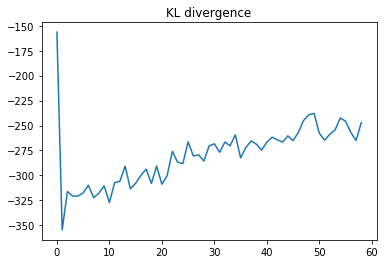

In [27]:
%matplotlib inline
y=optimizer.score_entropy
time=torch.arange(0,len(y),1.)
plt.title('KL divergence')
plt.plot(time, y)

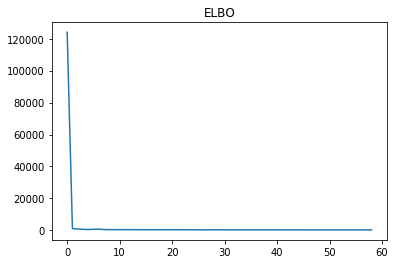

In [28]:
%matplotlib inline
y=torch.as_tensor(optimizer.score_elbo)
time=torch.arange(0,len(y),1.)
plt.title('ELBO')
plt.plot(time, y)


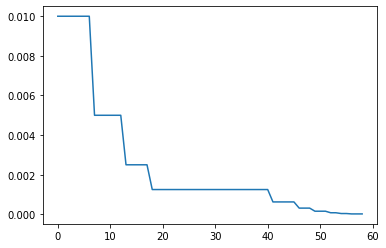

In [29]:
%matplotlib inline
y=optimizer.score_lr
time=torch.arange(0,len(y),1.)
plt.plot(time, y)


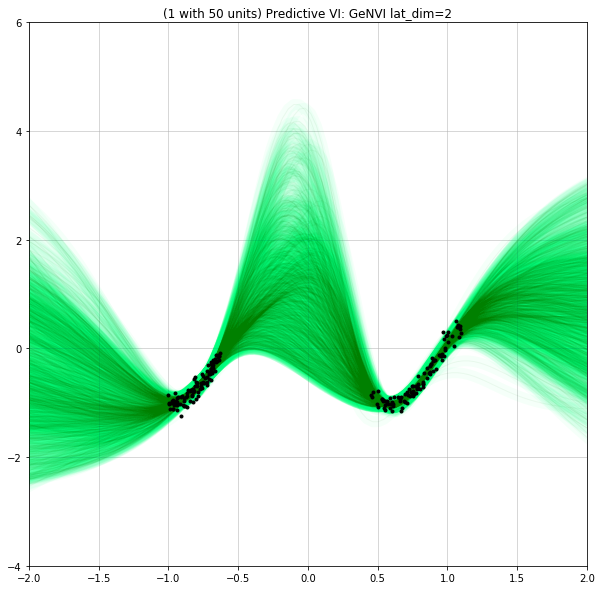

[tensor(252.4077, device='cuda:0'),
 tensor(-271.0292, device='cuda:0'),
 tensor(-137.5822, device='cuda:0')]

In [34]:
%matplotlib inline

def show(GeN,n):
    Z=GeN(n).detach()
    fig=setup.makePlot(Z,device)
    plt.title('('+str(nblayers)+' with '+str(layerwidth)+' units) Predictive VI: GeNVI lat_dim='+str(lat_dim))
    plt.show()
    return
    

    
show(GeN,1000)
scores

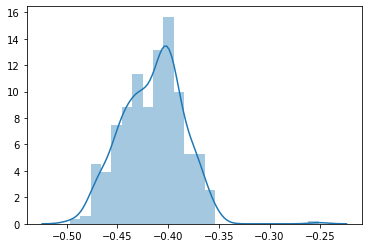

In [35]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

X=torch.Tensor([[-.7]]).to(device)#torch.arange(-2.,2.,0.1)
Y=model(X,GeN(500).detach()).squeeze().cpu()

sns.distplot(Y)

In [36]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(1000).detach(),'cpu')

In [37]:
print('nLPP_valid: '+str(nLPP_validation))
print('SE_valid: '+str(RSE_validation))
print('nLPP_test: '+str(nLPP_test))
print('SE_test: '+str(RSE_test))

nLPP_valid: (tensor(-0.8587), tensor(0.6231))
SE_valid: (tensor(0.0103), tensor(0.0147))
nLPP_test: (tensor(0.3586), tensor(1.1520))
SE_test: (tensor(0.4413), tensor(0.7950))


Pour un choix de points $x_0,...,x_{n-1}$, on définit:
$$
d(\theta,\theta')=\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert
$$
ou
$$
d_2(\theta,\theta')=\biggl(\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert^2\biggr)^{\frac{1}{2}}
$$


$P(f\in A)=P(\{\theta \mid f_\theta\in A\})$

$\theta \mapsto f_\theta$ (is it continuous?)

relation entre $d(\theta,\theta')$ et $d(f_\theta,f_\theta')$